In [15]:
import fasttext as fasttext
from pandas import concat, read_parquet
import seaborn as sns
from data import file
from preprocessing.text import tokenize
from preprocessing.http import download

In [11]:
pretrained_model = "./.pretrained/fasttext.lid.176.ftz"
download(f"https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz", pretrained_model)
model = fasttext.load_model(pretrained_model)

In [16]:
def predict_lang(text):
    """Predicts the language of a sentence

    Parameters
    ----------
    text : str
        The text to predict the language

    Returns
    -------
    str
        The predicted language (e.g. en, de, ...)
    """

    lang = model.predict(text)[0]
    return str(lang)[11:13]

# Data Loading

In [17]:

data_train = read_parquet(file.news_articles_raw_train)
data_train

,text_original,label
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,Sport
1,"Erfundene Bilder zu Filmen, die als verloren g...",Kultur
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,Web
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",Wirtschaft
4,Estland sieht den künftigen österreichischen P...,Inland
...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,Inland
9241,Sandhere soll in vergangener Woche bei Luftang...,International
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,Wirtschaft
9243,Landeshauptmann will den vierten Regierungssit...,Inland


In [19]:
data_test = read_parquet(file.news_articles_raw_test)
data_test

,text_original,label
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-...",Wirtschaft
1,Franzosen verteidigen 2:1-Führung – Kritische ...,Sport
2,Neues Video von Designern macht im Netz die Ru...,Web
3,23-jähriger Brasilianer muss vier Spiele pausi...,Sport
4,Aufständische verwendeten Chemikalie bei Gefec...,International
...,...,...
1023,"Programm ""Ebay Plus"" soll Ende September start...",Web
1024,"Fehlerhafte Bilanz 2013, Partei will berufen –...",Inland
1025,Als erster Olympia-Champion auch Hawaii-Sieger...,Sport
1026,Der Außenseiter aus Denver gewinnt die 50. Sup...,Sport


In [20]:
data_train_lang = concat([data_train, data_train.text_original.map(predict_lang).rename("lang")], axis=1)
data_train_lang

,text_original,label,lang
0,21-Jähriger fällt wohl bis Saisonende aus. Wie...,Sport,de
1,"Erfundene Bilder zu Filmen, die als verloren g...",Kultur,de
2,Der frischgekürte CEO Sundar Pichai setzt auf ...,Web,de
3,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",Wirtschaft,de
4,Estland sieht den künftigen österreichischen P...,Inland,de
...,...,...,...
9240,Bernd Saurer war Bridge-Juniorenweltmeister un...,Inland,de
9241,Sandhere soll in vergangener Woche bei Luftang...,International,de
9242,Derzeit Konzeptgruppe in Berlin – Kein Komment...,Wirtschaft,de
9243,Landeshauptmann will den vierten Regierungssit...,Inland,de


In [21]:

data_test_lang = concat([data_test, data_test.text_original.map(predict_lang).rename("lang")], axis=1)
data_test_lang

,text_original,label,lang
0,"Die Gewerkschaft GPA-djp lanciert den ""All-in-...",Wirtschaft,de
1,Franzosen verteidigen 2:1-Führung – Kritische ...,Sport,de
2,Neues Video von Designern macht im Netz die Ru...,Web,de
3,23-jähriger Brasilianer muss vier Spiele pausi...,Sport,de
4,Aufständische verwendeten Chemikalie bei Gefec...,International,de
...,...,...,...
1023,"Programm ""Ebay Plus"" soll Ende September start...",Web,de
1024,"Fehlerhafte Bilanz 2013, Partei will berufen –...",Inland,de
1025,Als erster Olympia-Champion auch Hawaii-Sieger...,Sport,de
1026,Der Außenseiter aus Denver gewinnt die 50. Sup...,Sport,de


# Data Quality (missingno)

## Training Set

<AxesSubplot:xlabel='lang', ylabel='count'>

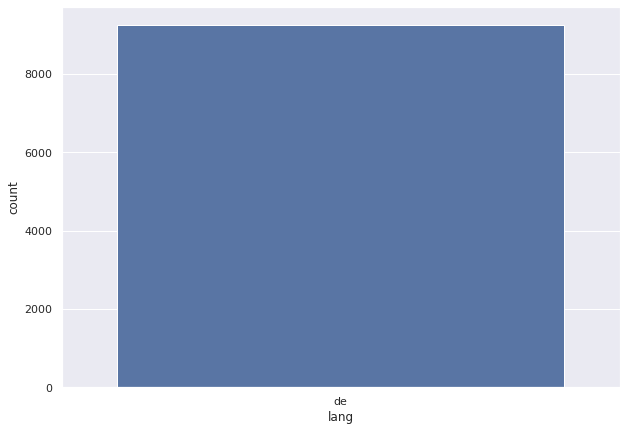

In [22]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.countplot(x="lang", data=data_train_lang)

## Test Set

<AxesSubplot:xlabel='lang', ylabel='count'>

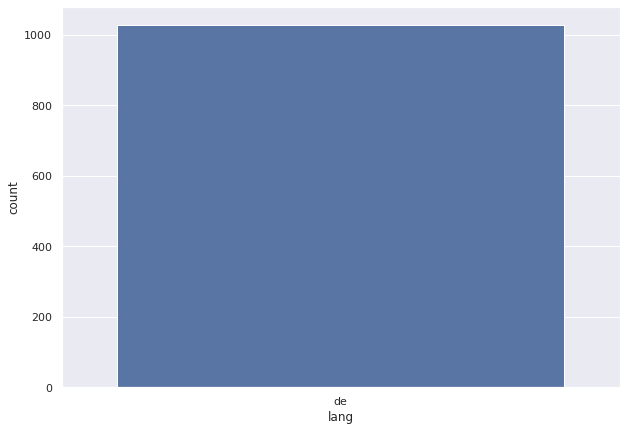

In [23]:
sns.set(rc={'figure.figsize': (10, 7)})
sns.countplot(x="lang", data=data_test_lang)

# Word Cloud


[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


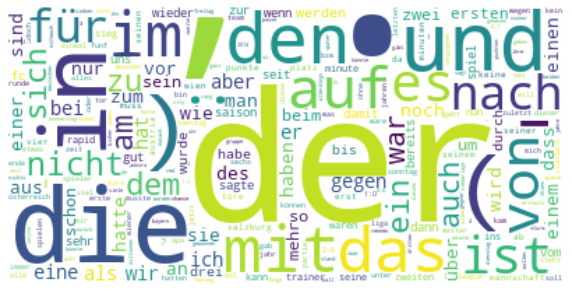

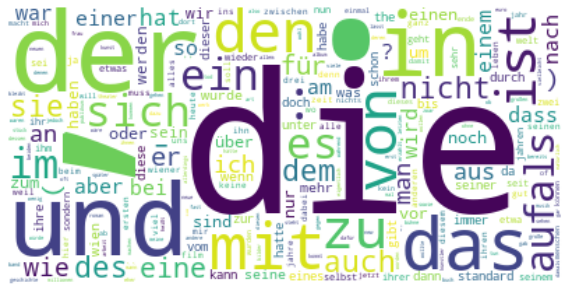

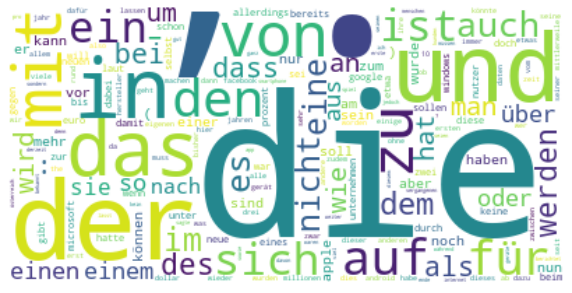

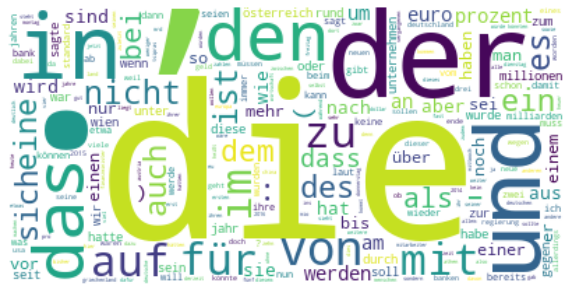

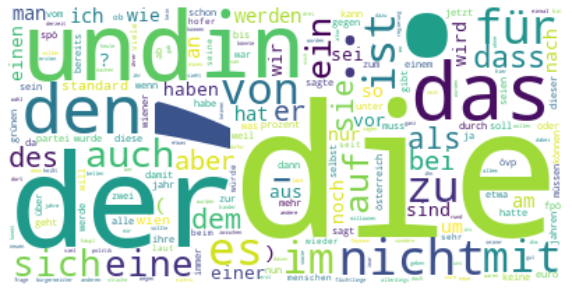

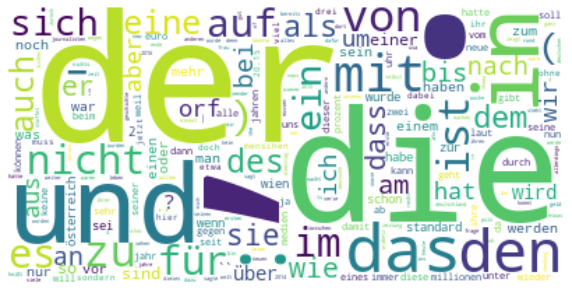

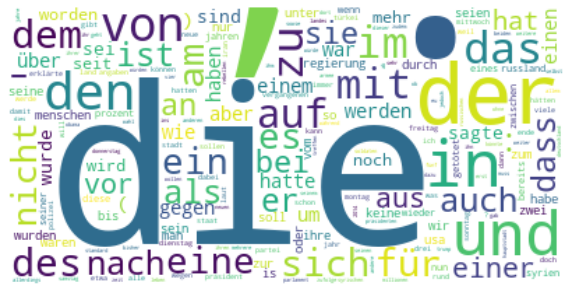

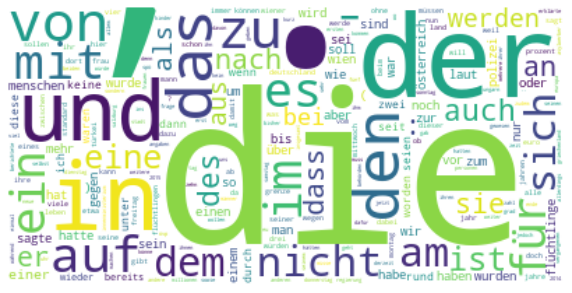

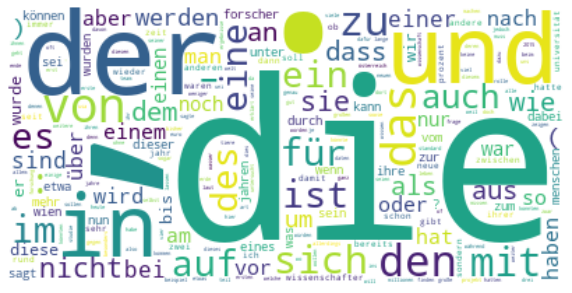

In [27]:
from reporting.text import create_word_cloud

for label in data_train["label"].unique():
    texts = data_train.loc[(data_train["label"] == label)].text_original
    create_word_cloud(texts.map(tokenize).rename('text_normalized'))